In [8]:
#DATA LOADING

In [9]:
import pandas as pd

# Replace the path below with the actual path where your file is saved

# Load the dataset
df = pd.read_csv("C:\\Users\\M.KAMRAN\\Desktop\\DATA SCIENCE PROJECTS\\Crime Detective system analysis\\Detective_system_crime_data.csv")

# Preview the dataset
print(df.head())


   division_number date_reported        date_occurred  area    area_name  \
0         10304468    2020-01-08  2020-01-08 22:30:00     3    Southwest   
1        190101086    2020-01-02  2020-01-01 03:30:00     1      Central   
2        200110444    2020-04-14  2020-02-13 12:00:00     1      Central   
3        191501505    2020-01-01  2020-01-01 17:30:00    15  N Hollywood   
4        191921269    2020-01-01  2020-01-01 04:15:00    19      Mission   

   reporting_district  part  crime_code  \
0                 377     2         624   
1                 163     2         624   
2                 155     2         845   
3                1543     2         745   
4                1998     2         740   

                                   crime_description  modus_operandi  ...  \
0                           BATTERY - SIMPLE ASSAULT       0444 0913  ...   
1                           BATTERY - SIMPLE ASSAULT  0416 1822 1414  ...   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE 

In [10]:
#DATA CLEANING

In [17]:
import pandas as pd

# Load your dataset
df = pd.read_csv("C:\\Users\\M.KAMRAN\\Desktop\\DATA SCIENCE PROJECTS\\Crime Detective system analysis\\Detective_system_crime_data.csv")

# Convert date fields to datetime
df['date_reported'] = pd.to_datetime(df['date_reported'], errors='coerce')
df['date_occurred'] = pd.to_datetime(df['date_occurred'], errors='coerce')

# Drop rows with missing critical values
df.dropna(subset=['date_reported', 'crime_description', 'location', 'latitude', 'longitude'], inplace=True)

# Create new features
df['hour_occurred'] = df['date_occurred'].dt.hour
df['day_of_week'] = df['date_occurred'].dt.day_name()
df['month'] = df['date_occurred'].dt.month
df['year'] = df['date_occurred'].dt.year


In [ ]:
#DATA VISUALIZATION

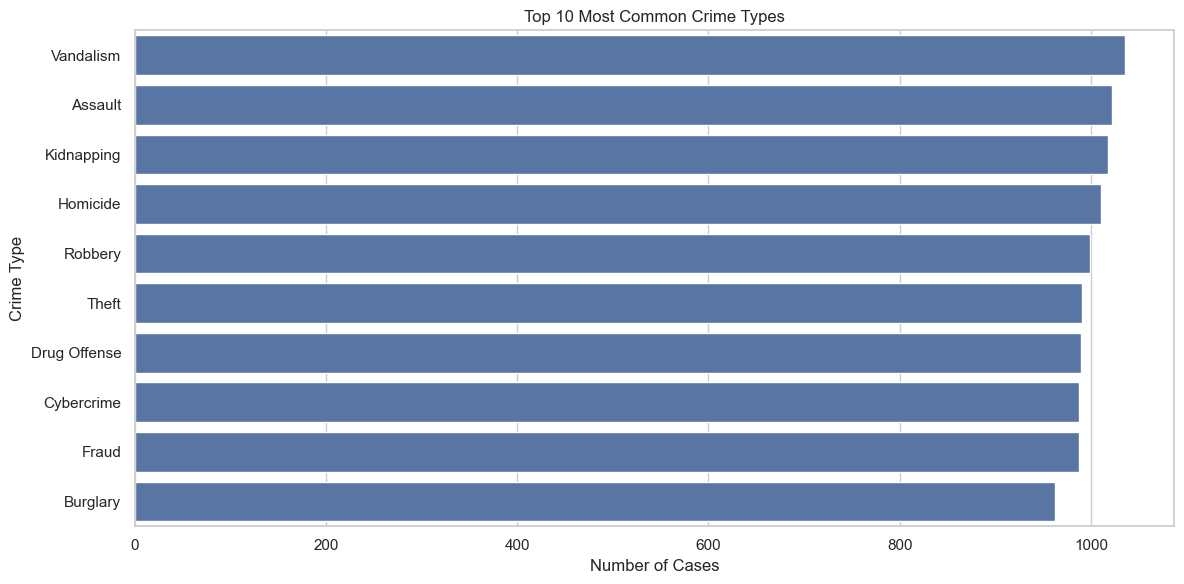

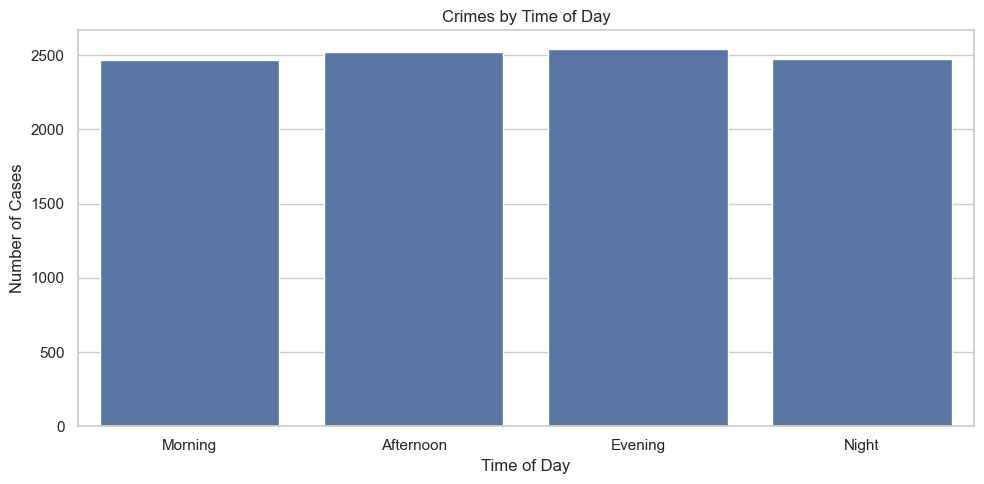

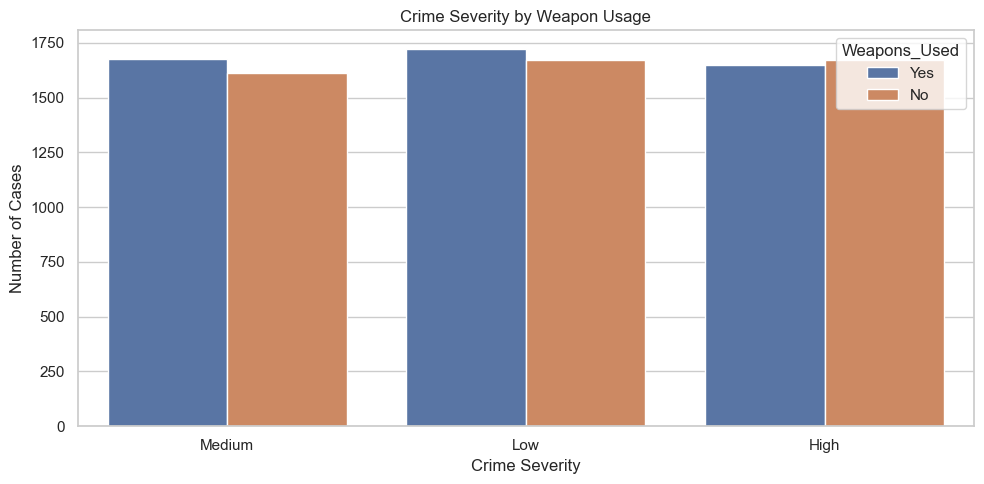

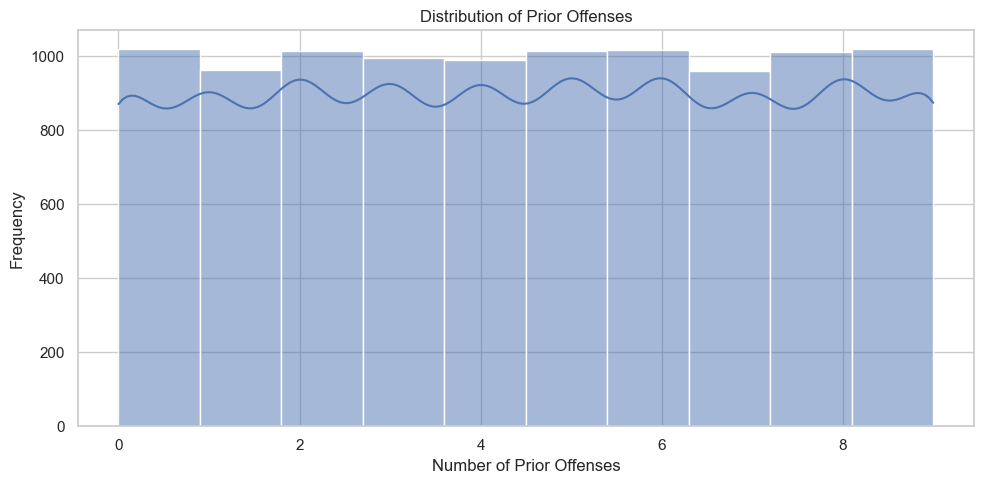

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv('cleaned_detective_system_data.csv')

# Optional: sample for fast plotting
df_eda = df.sample(10000, random_state=42)

# Set seaborn style
sns.set(style="whitegrid")

# 1. Top 10 Most Common Crime Types
plt.figure(figsize=(12, 6))
sns.countplot(y=df_eda['Crime_Type'], order=df_eda['Crime_Type'].value_counts().iloc[:10].index)
plt.title("Top 10 Most Common Crime Types")
plt.xlabel("Number of Cases")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()

# 2. Crimes by Time of Day
plt.figure(figsize=(10, 5))
sns.countplot(data=df_eda, x='Time_of_Day', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Crimes by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()

# 3. Crime Severity by Weapon Usage
plt.figure(figsize=(10, 5))
sns.countplot(data=df_eda, x='Crime_Severity', hue='Weapons_Used')
plt.title("Crime Severity by Weapon Usage")
plt.xlabel("Crime Severity")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()

# 4. Prior Offenses Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_eda['Prior_Offenses'], bins=10, kde=True)
plt.title("Distribution of Prior Offenses")
plt.xlabel("Number of Prior Offenses")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
#ML Modeling Code to Predict Arrest_Made

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('cleaned_detective_system_data.csv')

# Drop rows with critical missing values
df.dropna(subset=['Crime_Type', 'Location', 'Date_Reported', 'Arrest_Made'], inplace=True)

# Convert date to datetime
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'])
df['hour'] = df['Date_Reported'].dt.hour
df['day_of_week'] = df['Date_Reported'].dt.day_name()

# Encode categorical features
encode_cols = ['Crime_Type', 'Location', 'Time_of_Day', 'Weapons_Used', 'day_of_week']
le_dict = {}
for col in encode_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# Encode target variable
df['Arrest_Made'] = LabelEncoder().fit_transform(df['Arrest_Made'])  # Yes=1, No=0

# Define features and target
features = ['Crime_Type', 'Location', 'Time_of_Day', 'Weapons_Used', 'Prior_Offenses', 'hour', 'day_of_week']
X = df[features]
y = df['Arrest_Made']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("🔍 Model Evaluation - Predict Arrest_Made")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


🔍 Model Evaluation - Predict Arrest_Made
Accuracy: 0.49855
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49     19760
           1       0.50      0.50      0.50     20240

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.50      0.50      0.50     40000



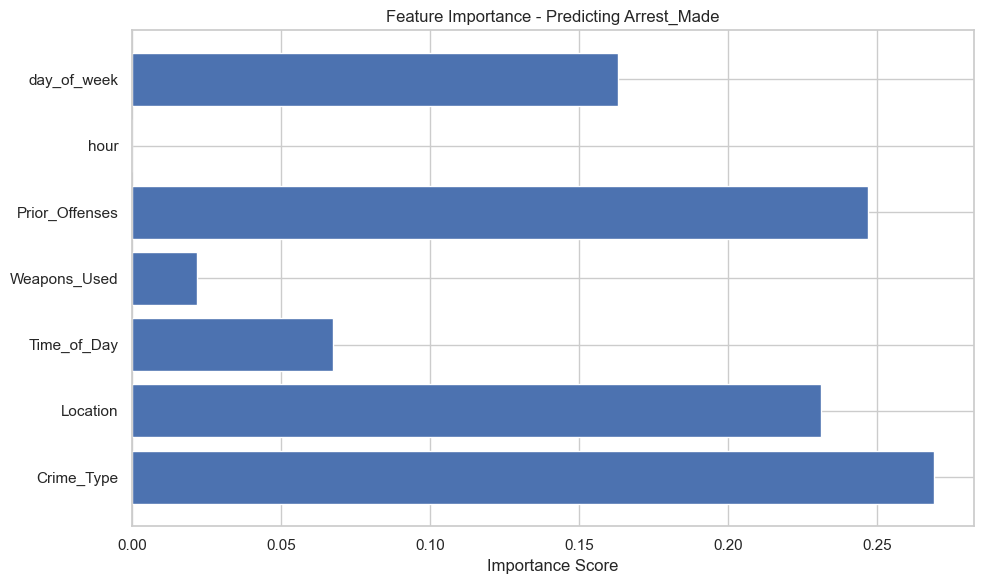

In [25]:
import matplotlib.pyplot as plt

# Feature importance plot
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title("Feature Importance - Predicting Arrest_Made")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
#ML Code to Predict Crime_Severity

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("cleaned_detective_system_data.csv")

# Drop rows with missing values in critical fields
df.dropna(subset=['Crime_Type', 'Location', 'Date_Reported', 'Crime_Severity'], inplace=True)

# Convert date to datetime and extract features
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'])
df['hour'] = df['Date_Reported'].dt.hour
df['day_of_week'] = df['Date_Reported'].dt.day_name()

# Encode categorical columns
encode_cols = ['Crime_Type', 'Location', 'Time_of_Day', 'Weapons_Used', 'day_of_week']
for col in encode_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode target variable
df['Crime_Severity'] = LabelEncoder().fit_transform(df['Crime_Severity'])  # Low=1, Medium=2, High=0 (varies)



high_severity = ['Homicide', 'Kidnapping', 'Robbery']
df['Crime_Severity'] = df['Crime_Type'].apply(lambda x: 'High' if x in high_severity else 'Low')






# Define features and target
features = ['Crime_Type', 'Location', 'Time_of_Day', 'Weapons_Used', 'Prior_Offenses', 'hour', 'day_of_week']
X = df[features]
y = df['Crime_Severity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("🔍 Model Evaluation - Predict Crime_Severity")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


🔍 Model Evaluation - Predict Crime_Severity
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00     40000

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



In [27]:
# Assuming your cleaned DataFrame is called `df`
df.to_csv("cleaned_crime_dataset.csv", index=False)

